# CIE_4140_Lecture_3_2_Python #

## Free vibration of an SDOF with viscous damping under harmonic excitation ##

In [1]:
import sympy as sp

In [2]:
u = sp.symbols('u',cls=sp.Function)
t, omega_n, f_0, m, Omega, zeta = sp.symbols('t, omega_n, f_0, m, Omega, zeta',real=True,positive=True)
u_0, v_0 = sp.symbols('u_0, v_0')

In [3]:
Equation_of_Motion= sp.Eq(sp.diff(u(t),t,2)+2*zeta*omega_n*sp.diff(u(t),t)+omega_n **2 * u(t),f_0*sp.cos(Omega*t)/m)
display(Equation_of_Motion)

Eq(omega_n**2*u(t) + 2*omega_n*zeta*Derivative(u(t), t) + Derivative(u(t), (t, 2)), f_0*cos(Omega*t)/m)

In [4]:
u_sol_general = sp.dsolve(Equation_of_Motion, u(t)).rhs
display(u_sol_general)

C1*exp(omega_n*t*(-zeta + sqrt(zeta - 1)*sqrt(zeta + 1))) + C2*exp(-omega_n*t*(zeta + sqrt(zeta - 1)*sqrt(zeta + 1))) - Omega**2*f_0*cos(Omega*t)/(m*(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4)) + 2*Omega*f_0*omega_n*zeta*sin(Omega*t)/(m*(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4)) + f_0*omega_n**2*cos(Omega*t)/(m*(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4))

The expresion above can be written in the following real-valued form:

In [5]:
A, B = sp.symbols('A, B',real=True)
u_sol_general = (sp.exp(-omega_n*t*zeta) * (A*sp.cos(omega_n*t*sp.sqrt(-zeta**2 + 1)) +
                                   B*sp.sin(omega_n*t*sp.sqrt(-zeta**2 + 1))) + 
         f_0*(2*sp.sin(Omega*t)*Omega*zeta*omega_n -
              sp.cos(Omega*t)*Omega**2 +
              sp.cos(Omega*t)*omega_n**2)
         /(omega_n**4 + (4*zeta**2 - 2)*Omega**2*omega_n**2 + Omega**4))
display(u_sol_general)

f_0*(-Omega**2*cos(Omega*t) + 2*Omega*omega_n*zeta*sin(Omega*t) + omega_n**2*cos(Omega*t))/(Omega**4 + Omega**2*omega_n**2*(4*zeta**2 - 2) + omega_n**4) + (A*cos(omega_n*t*sqrt(1 - zeta**2)) + B*sin(omega_n*t*sqrt(1 - zeta**2)))*exp(-omega_n*t*zeta)

In [6]:
IC1 = sp.Eq(u_sol_general.subs(t,0),u_0)
display(IC1)

Eq(A + f_0*(-Omega**2 + omega_n**2)/(Omega**4 + Omega**2*omega_n**2*(4*zeta**2 - 2) + omega_n**4), u_0)

In [7]:
IC2 = sp.Eq(u_sol_general.diff(t).subs(t,0),v_0)
display(IC2)

Eq(-A*omega_n*zeta + B*omega_n*sqrt(1 - zeta**2) + 2*Omega**2*f_0*omega_n*zeta/(Omega**4 + Omega**2*omega_n**2*(4*zeta**2 - 2) + omega_n**4), v_0)

In [8]:
sol = sp.solve((IC1,IC2),(A,B))
sol[A] = sp.simplify(sol[A])
sol[B] = sp.simplify(sol[B])
display(sol[A])
display(sol[B])

(Omega**4*u_0 + Omega**2*f_0 + 4*Omega**2*omega_n**2*u_0*zeta**2 - 2*Omega**2*omega_n**2*u_0 - f_0*omega_n**2 + omega_n**4*u_0)/(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4)

(Omega**4*omega_n*u_0*zeta + Omega**4*v_0 - Omega**2*f_0*omega_n*zeta + 4*Omega**2*omega_n**3*u_0*zeta**3 - 2*Omega**2*omega_n**3*u_0*zeta + 4*Omega**2*omega_n**2*v_0*zeta**2 - 2*Omega**2*omega_n**2*v_0 - f_0*omega_n**3*zeta + omega_n**5*u_0*zeta + omega_n**4*v_0)/(omega_n*sqrt(1 - zeta**2)*(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4))

In [9]:
u_sol = u_sol_general.subs(sol)
display(u_sol)

f_0*(-Omega**2*cos(Omega*t) + 2*Omega*omega_n*zeta*sin(Omega*t) + omega_n**2*cos(Omega*t))/(Omega**4 + Omega**2*omega_n**2*(4*zeta**2 - 2) + omega_n**4) + ((Omega**4*u_0 + Omega**2*f_0 + 4*Omega**2*omega_n**2*u_0*zeta**2 - 2*Omega**2*omega_n**2*u_0 - f_0*omega_n**2 + omega_n**4*u_0)*cos(omega_n*t*sqrt(1 - zeta**2))/(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4) + (Omega**4*omega_n*u_0*zeta + Omega**4*v_0 - Omega**2*f_0*omega_n*zeta + 4*Omega**2*omega_n**3*u_0*zeta**3 - 2*Omega**2*omega_n**3*u_0*zeta + 4*Omega**2*omega_n**2*v_0*zeta**2 - 2*Omega**2*omega_n**2*v_0 - f_0*omega_n**3*zeta + omega_n**5*u_0*zeta + omega_n**4*v_0)*sin(omega_n*t*sqrt(1 - zeta**2))/(omega_n*sqrt(1 - zeta**2)*(Omega**4 + 4*Omega**2*omega_n**2*zeta**2 - 2*Omega**2*omega_n**2 + omega_n**4)))*exp(-omega_n*t*zeta)

## Development of resoncance in time ##

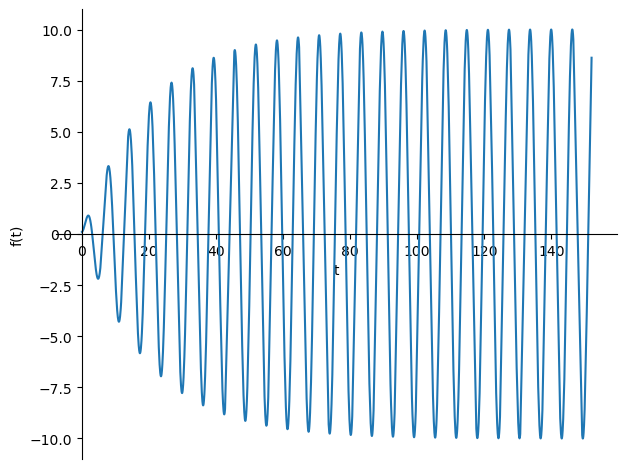

In [10]:
solution_in_resonance = u_sol.subs([(Omega,omega_n*sp.sqrt(1-zeta**2))])
sp.plot(solution_in_resonance.subs([(u_0,0.1),(v_0,0.1),(f_0,1),(omega_n,1),(zeta,0.05)]), (t , 0 , 152));

In [11]:
%matplotlib notebook

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [13]:
u_resonance_func = sp.lambdify((u_0,v_0,omega_n,zeta,f_0,t),solution_in_resonance)

<IPython.core.display.Javascript object>


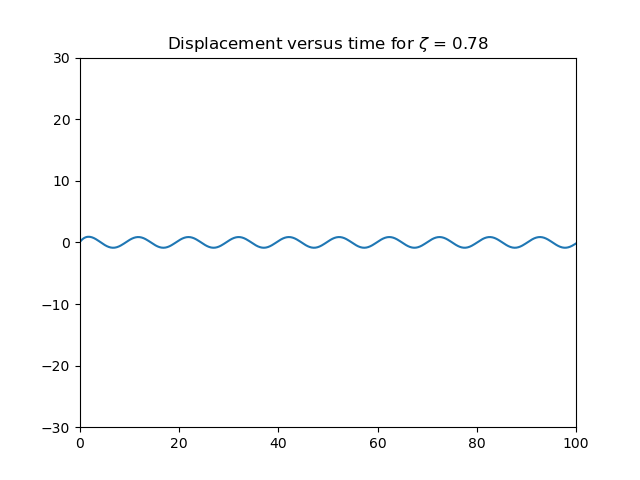

In [14]:
fig, ax = plt.subplots()
tdata = np.linspace(0,100,500)
line, = ax.plot([], [])
ax.set_xlim(0, 100)
ax.set_ylim(-30, 30)

def update(frame):
    ydata = u_resonance_func(u_0=0.1,v_0=1,omega_n=1,f_0=1,zeta=frame,t=tdata)
    ax.set_title("Displacement versus time for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.01,0.8,100),interval = 100)
plt.show()

## The steady-state solution ##

In [15]:
u_steady = u_sol.args[1]
display(u_steady)

f_0*(-Omega**2*cos(Omega*t) + 2*Omega*omega_n*zeta*sin(Omega*t) + omega_n**2*cos(Omega*t))/(Omega**4 + Omega**2*omega_n**2*(4*zeta**2 - 2) + omega_n**4)

<IPython.core.display.Javascript object>


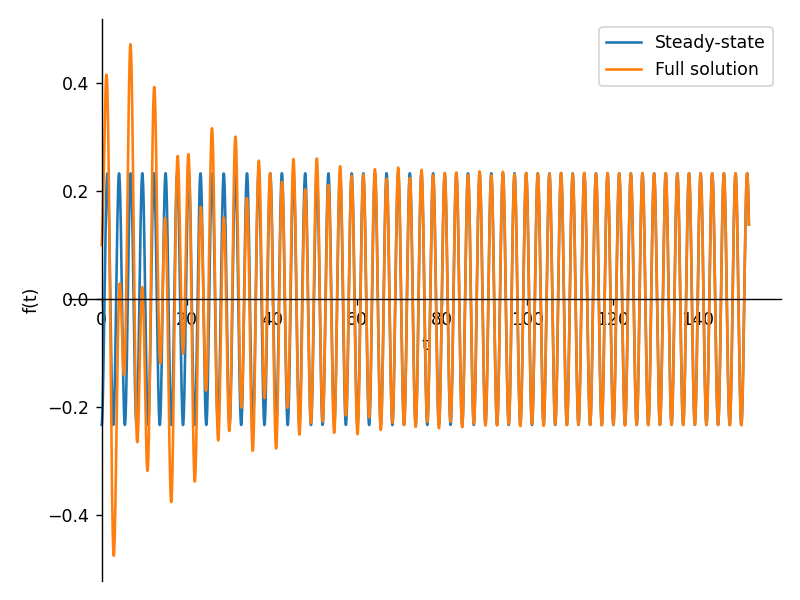

In [16]:
p0 = sp.plotting.plot(u_steady.subs([(u_0,0.1),(v_0,0.1),(f_0,1),(omega_n,1),(zeta,0.05),(Omega,2.3)]), (t , 0 , 152),label='Steady-state' ,legend=True,show=False,adaptive=False,nb_of_points=3000)
p1 = sp.plotting.plot(   u_sol.subs([(u_0,0.1),(v_0,0.1),(f_0,1),(omega_n,1),(zeta,0.05),(Omega,2.3)]), (t , 0 , 152),label='Full solution',legend=True,show=False,adaptive=False,nb_of_points=3000)
p0.append(p1[0])
p0.show()

In [18]:
u_func = sp.lambdify((u_0,v_0,omega_n,zeta,f_0,t,Omega),u_sol)

<IPython.core.display.Javascript object>


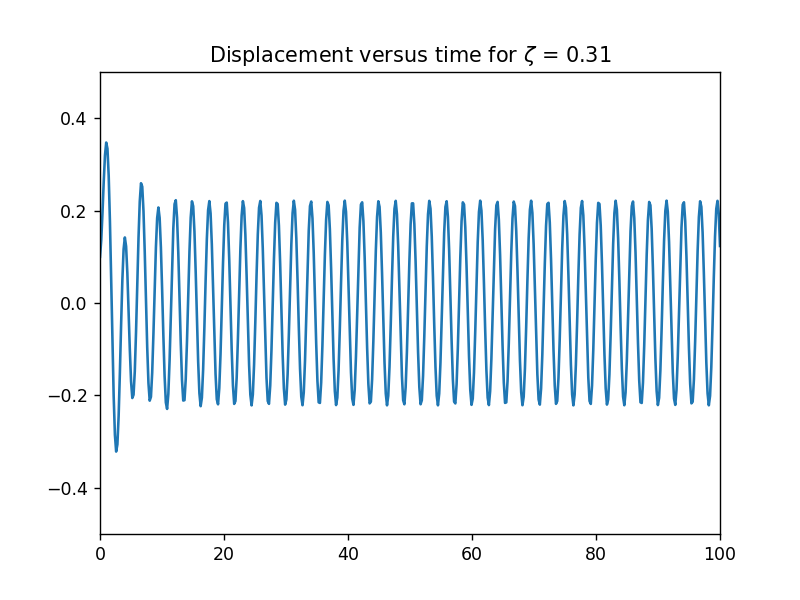

In [19]:
fig, ax = plt.subplots()
tdata = np.linspace(0,100,500)
line, = ax.plot([], [])
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 0.5)

def update(frame):
    ydata = u_func(u_0=0.1,v_0=0.1,f_0=1,omega_n=1,Omega=2.3,zeta=frame,t=tdata)
    ax.set_title("Displacement versus time for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(tdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.01,.8,100),interval = 100)
plt.show()

## The magnification factor ##

In [19]:
Omega_dl = sp.symbols('Omega_dl')
magnification_factor = 1 / sp.sqrt((1-Omega_dl**2)**2+4*zeta**2*Omega_dl**2)

In [20]:
magnification_factor_func = sp.lambdify((Omega_dl,zeta), magnification_factor)

<IPython.core.display.Javascript object>


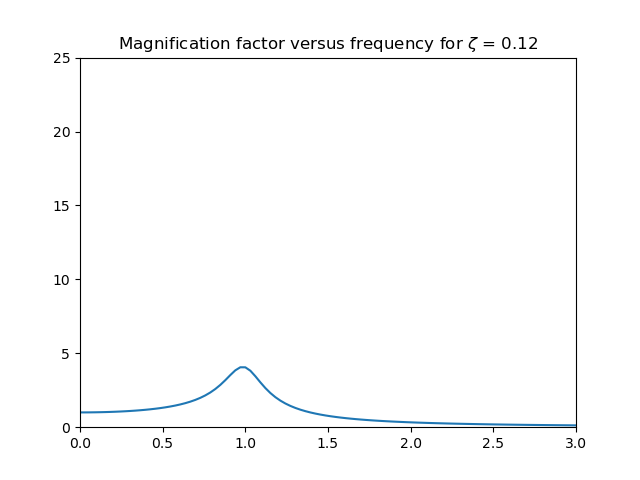

In [21]:
fig, ax = plt.subplots()
frequencydata = np.linspace(0,3,100)
line, = ax.plot([], [])
ax.set_xlim(0, 3)
ax.set_ylim(0,25)

def update(frame):
    ydata = magnification_factor_func(Omega_dl = frequencydata , zeta = frame)
    ax.set_title("Magnification factor versus frequency for $\zeta$ = "+str(np.round(frame,2)))
    line.set_data(frequencydata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0.02,1.3,100),interval = 100)
plt.show()